# Анализ данных сервиса Яндекс.Афиша

Целью данной работы является изучение данных Яндекс.Афиши с июня 2017 г. по май 2018 г. (посещения, заказы, рекламные расходы). Постараемся ответить на следующие вопросы: 
- как клиенты пользуются сервисом;
- когда делают первые покупки;
- сколько денег приносит компании каждый клиент;
- когда расходы на привлечение клиента окупаются.

На основе результатов этого анализа дадим рекомендации маркетинговому отделу по снижению расходов: отказу от невыгодных источников трафика и перераспределению бюджета.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Знакомство-с-данными" data-toc-modified-id="Знакомство-с-данными-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Знакомство с данными</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Продуктовые-метрики" data-toc-modified-id="Продуктовые-метрики-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Продуктовые метрики</a></span><ul class="toc-item"><li><span><a href="#DAU,-WAU-и-MAU" data-toc-modified-id="DAU,-WAU-и-MAU-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>DAU, WAU и MAU</a></span></li><li><span><a href="#Среднее-количество-посещений" data-toc-modified-id="Среднее-количество-посещений-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Среднее количество посещений</a></span></li><li><span><a href="#Продложительность-сессий" data-toc-modified-id="Продложительность-сессий-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Продложительность сессий</a></span></li><li><span><a href="#Retention-Rate" data-toc-modified-id="Retention-Rate-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>Retention Rate</a></span></li></ul></li><li><span><a href="#Метрики-электронной-коммерции" data-toc-modified-id="Метрики-электронной-коммерции-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Метрики электронной коммерции</a></span><ul class="toc-item"><li><span><a href="#Время-до-совершения-покупки" data-toc-modified-id="Время-до-совершения-покупки-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Время до совершения покупки</a></span></li><li><span><a href="#Среднее-количество-покупок" data-toc-modified-id="Среднее-количество-покупок-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Среднее количество покупок</a></span></li><li><span><a href="#Средний-чек-(AOV)" data-toc-modified-id="Средний-чек-(AOV)-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Средний чек (AOV)</a></span></li><li><span><a href="#LTV" data-toc-modified-id="LTV-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>LTV</a></span></li></ul></li><li><span><a href="#Маркетинговые-метрики" data-toc-modified-id="Маркетинговые-метрики-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Маркетинговые метрики</a></span><ul class="toc-item"><li><span><a href="#&quot;Главный&quot;-источник-для-каждого-пользователя" data-toc-modified-id="&quot;Главный&quot;-источник-для-каждого-пользователя-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>"Главный" источник для каждого пользователя</a></span></li><li><span><a href="#Расходы-на-маркетинг-по-источникам" data-toc-modified-id="Расходы-на-маркетинг-по-источникам-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Расходы на маркетинг по источникам</a></span></li><li><span><a href="#CAC" data-toc-modified-id="CAC-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>CAC</a></span></li><li><span><a href="#ROMI" data-toc-modified-id="ROMI-3.3.4"><span class="toc-item-num">3.3.4&nbsp;&nbsp;</span>ROMI</a></span></li></ul></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Знакомство с данными

In [1]:
# импортируем все необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

In [3]:
visits.head(10)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [5]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [7]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [8]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


Изучили все три таблицы. Обращают на себя внимание некорректные названия столбцов. Следует привести их к нижнему регистру и использовать нижнее подчеркивание. Также видим некорректный тип данных в столбцах с датами. Приведем их к формату datetime.   

## Предобработка данных

Приведем названия стобцов в таблицах с визитами и заказами к нижнему регистру.


In [9]:
visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()

Переименуем те столбцы, где в названии больше одного слова, используя нижнее подчеркивание.

In [10]:
visits = visits.rename(columns={'end ts':'end_ts', 'source id':'source_id', 'start ts':'start_ts'}) 
orders = orders.rename(columns={'buy ts':'buy_ts'}) 

In [11]:
visits.columns

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')

In [12]:
orders.columns

Index(['buy_ts', 'revenue', 'uid'], dtype='object')

Изменим тип данных в столбцах с датами на datetime.

In [13]:
visits[['end_ts','start_ts']] = visits[['end_ts','start_ts']].astype('datetime64')

In [14]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end_ts       359400 non-null datetime64[ns]
source_id    359400 non-null int64
start_ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [15]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

In [16]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null datetime64[ns]
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [17]:
costs['dt'] = pd.to_datetime(costs['dt'])

In [18]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [19]:
print(visits.isna().sum())
print(orders.isna().sum())
print(costs.isna().sum())

device       0
end_ts       0
source_id    0
start_ts     0
uid          0
dtype: int64
buy_ts     0
revenue    0
uid        0
dtype: int64
source_id    0
dt           0
costs        0
dtype: int64


Видим, что пропусков в наших таблицах нет.

In [20]:
print(visits.duplicated().sum())
print(orders.duplicated().sum())
print(costs.duplicated().sum())

0
0
0


Дубликаты в таблицах отсутствуют.

Таким образом, мы провели предобработку данных: проверили таблицы на наличие пропусков и дубликатов, переименовали столбцы и привели столбцы с датами к нужному типу. 

## Исследовательский анализ данных

### Продуктовые метрики

#### DAU, WAU и MAU

Рассчитаем продуктовые метрики DAU, WAU и MAU. Для этого выделим столбцы с неделей, месяцем и полной датой.

In [21]:
visits['visit_date'] = visits['start_ts'].dt.date
visits['visit_month'] = visits['start_ts'].astype('datetime64[M]')
visits['visit_week'] = visits['start_ts'].astype('datetime64[W]')

In [22]:
visits.head()

,device,end_ts,source_id,start_ts,uid,visit_date,visit_month,visit_week
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-01,2017-12-14
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-01,2018-02-15
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-07-01,2017-06-29
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-01,2018-05-17
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-01,2017-12-21


Сгруппируем данные по времени визита, посчитаем уникальных пользователей и найдем среднее значение. 

In [23]:
dau = visits.groupby('visit_date').agg({'uid':'nunique'})
dau_total = dau.mean()
dau_total

uid    907.991758
dtype: float64

In [24]:
wau = visits.groupby('visit_week').agg({'uid':'nunique'})
wau_total = wau.mean()
wau_total

uid    5724.415094
dtype: float64

In [25]:
mau = visits.groupby('visit_month').agg({'uid':'nunique'})
mau_total = mau.mean()
mau_total

uid    23228.416667
dtype: float64

In [26]:
dau = dau.reset_index()
dau

,visit_date,uid
0,2017-06-01,605
1,2017-06-02,608
2,2017-06-03,445
3,2017-06-04,476
4,2017-06-05,820
...,...,...
359,2018-05-27,620
360,2018-05-28,1039
361,2018-05-29,948
362,2018-05-30,1289


Теперь отобразим на графиках изменение метрик (DAU, WAU и MAU) во времени.

In [27]:
sns.set_style('darkgrid')

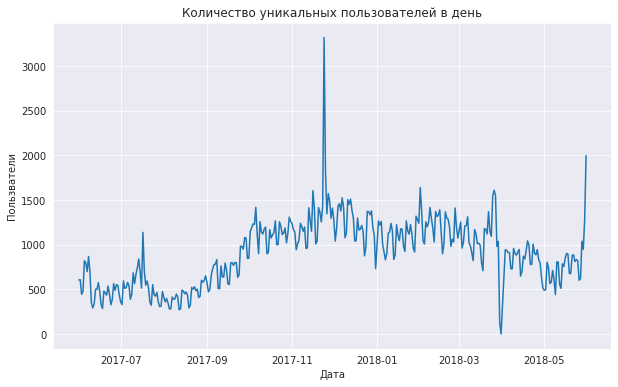

In [28]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='visit_date', y='uid', data=dau)
plt.title('Количество уникальных пользователей в день')
plt.xlabel('Дата')
plt.ylabel('Пользватели')
plt.show;

In [29]:
wau = wau.reset_index()
wau.head()

,visit_week,uid
0,2017-06-01,4082
1,2017-06-08,3311
2,2017-06-15,2844
3,2017-06-22,3079
4,2017-06-29,3055


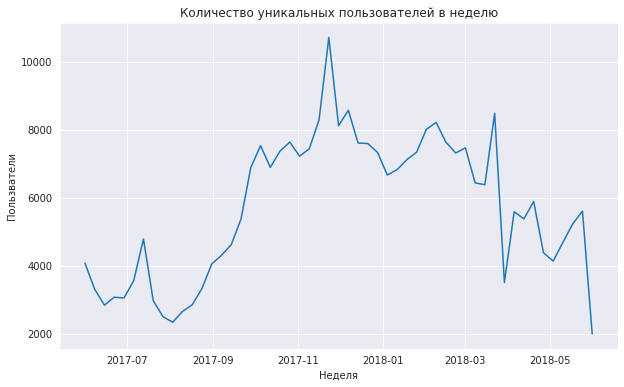

In [30]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='visit_week', y='uid', data=wau)
plt.title('Количество уникальных пользователей в неделю')
plt.xlabel('Неделя')
plt.ylabel('Пользватели')
plt.show;

In [31]:
mau = mau.reset_index()
mau

,visit_month,uid
0,2017-06-01,13259
1,2017-07-01,14183
2,2017-08-01,11631
3,2017-09-01,18975
4,2017-10-01,29692
5,2017-11-01,32797
6,2017-12-01,31557
7,2018-01-01,28716
8,2018-02-01,28749
9,2018-03-01,27473


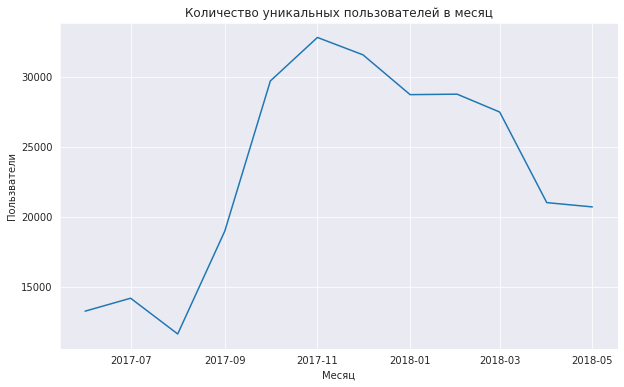

In [32]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='visit_month', y='uid', data=mau)
plt.title('Количество уникальных пользователей в месяц')
plt.xlabel('Месяц')
plt.ylabel('Пользватели')
plt.show;

На графиках мы можем увидеть следующие особенности изменения метрик во времени:
- небольшой спад в июне-июле 2017 г.;
- рост количетсва уникальных пользователей, начиная с августа 2017 г., с выходом на пик в ноябре-декабре 2017 г.;
- спад пользовательского интереса, особенно заметный в апреле-мае 2018 г.

Эти колебания могут быть вызваны как сезонностью (пик приходится на конец 2017 - начало 2018 гг., когда наблюдается повышенный спрос на билеты), так и особенностями проводимой в это время рекламной кампании.  

#### Среднее количество посещений

Теперь рассчитаем, сколько раз за день пользователи в среднем заходят на сайт.

In [33]:
visits.head()

,device,end_ts,source_id,start_ts,uid,visit_date,visit_month,visit_week
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-01,2017-12-14
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-01,2018-02-15
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-07-01,2017-06-29
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-01,2018-05-17
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-01,2017-12-21


In [34]:
session_per_user = visits.groupby('visit_date').agg({'uid': ['count','nunique']}).reset_index()
session_per_user

visit_date   uid        
                count nunique
0    2017-06-01   664     605
1    2017-06-02   658     608
2    2017-06-03   477     445
3    2017-06-04   510     476
4    2017-06-05   893     820
..          ...   ...     ...
359  2018-05-27   672     620
360  2018-05-28  1156    1039
361  2018-05-29  1035     948
362  2018-05-30  1410    1289
363  2018-05-31  2256    1997

[364 rows x 3 columns]

In [35]:
session_per_user.columns = ['visit_date', 'n_sessions', 'n_users']
session_per_user['session_per_user'] = session_per_user['n_sessions'] / session_per_user['n_users']
session_per_user

,visit_date,n_sessions,n_users,session_per_user
0,2017-06-01,664,605,1.097521
1,2017-06-02,658,608,1.082237
2,2017-06-03,477,445,1.071910
3,2017-06-04,510,476,1.071429
4,2017-06-05,893,820,1.089024
...,...,...,...,...
359,2018-05-27,672,620,1.083871
360,2018-05-28,1156,1039,1.112608
361,2018-05-29,1035,948,1.091772
362,2018-05-30,1410,1289,1.093871


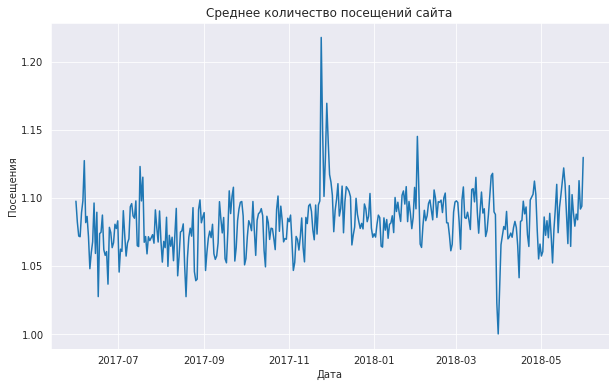

In [36]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='visit_date', y='session_per_user', data=session_per_user)
plt.title('Среднее количество посещений сайта')
plt.xlabel('Дата')
plt.ylabel('Посещения')
plt.show;

В целом, график напоминает изменение во времени метрики DAU, т.е. ноябрь-декабрь 2017 г. отмечен не только большим притоком новых пользователей, но и высокой активностью всех пользователей.

#### Продложительность сессий

Теперь изучим, сколько времени пользователи проводят на сайте.

In [37]:
visits.head()

,device,end_ts,source_id,start_ts,uid,visit_date,visit_month,visit_week
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-01,2017-12-14
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-01,2018-02-15
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-07-01,2017-06-29
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-01,2018-05-17
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-01,2017-12-21


In [38]:
visits['ses_dur_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds 

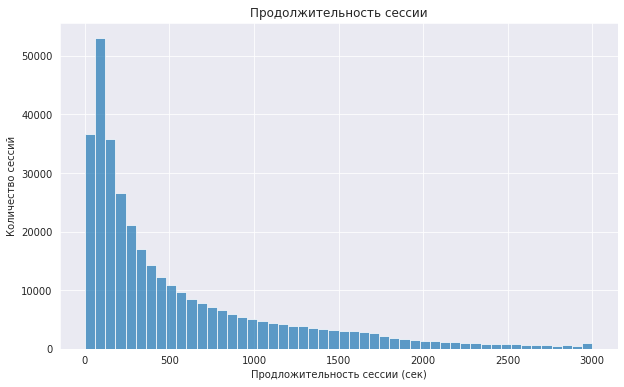

In [39]:
visits['ses_dur_sec'].plot.hist(bins=50, range=(0,3000), figsize=(10,6), alpha=0.7)
plt.title('Продолжительность сессии')
plt.xlabel('Продложительность сессии (сек)')
plt.ylabel('Количество сессий')
plt.show;

Распределение по продолжительности сессии не очень похоже на нормальное, поэтому корректно будет рассчитать не среднее значение, а моду.

In [40]:
visits['ses_dur_sec'].mode()

0    60
dtype: int64

Таким образом, определили продолжительность типичной пользовательской сессии - 60 секунд.

#### Retention Rate

Теперь рассчитаем Retention Rate, используя когортный анализ.

Определим дату первого посещения сайта.

In [41]:
first_visit_date = visits.groupby('uid').agg({'start_ts': 'min'})

In [42]:
first_visit_date.columns = ['first_visit_date']
first_visit_date.head()

,first_visit_date
uid,
11863502262781,2018-03-01 17:27:00
49537067089222,2018-02-06 15:55:00
297729379853735,2017-06-07 18:47:00
313578113262317,2017-09-18 22:49:00
325320750514679,2017-09-30 14:29:00


Объединим получившуюся таблицу с датой первого посещения с исходной таблицей по визитам.

In [43]:
# используем левый JOIN
visits = visits.join(first_visit_date, on='uid')

Выделим столбцы с месяцем.

In [44]:
visits['first_visit_month'] = visits['first_visit_date'].astype('datetime64[M]')
visits['visit_month'] = visits['start_ts'].astype('datetime64[M]')
visits.head()

,device,end_ts,source_id,start_ts,uid,visit_date,visit_month,visit_week,ses_dur_sec,first_visit_date,first_visit_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-01,2017-12-14,1080,2017-12-20 17:20:00,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-01,2018-02-15,1680,2018-02-19 16:53:00,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-07-01,2017-06-29,0,2017-07-01 01:54:00,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-01,2018-05-17,1440,2018-03-09 20:05:00,2018-03-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-01,2017-12-21,0,2017-12-27 14:06:00,2017-12-01


Создадим столбец с lifetime'ом когорты.

In [45]:
visits['cohort_lifetime'] = visits['visit_month'] - visits['first_visit_month'] 
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1, 'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int')

Подсчитаем количество уникальных (новых) пользователей на каждый месяц жизни когорты.

In [46]:
cohorts = visits.groupby(['first_visit_month', 'cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
cohorts.head()

,first_visit_month,cohort_lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909


Определим изначальное количество пользователей в каждой когорте.

In [47]:
initial_users_count = cohorts.loc[cohorts['cohort_lifetime'] == 0][['first_visit_month','uid']]

In [48]:
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})
initial_users_count

,first_visit_month,cohort_users
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977
50,2017-11-01,27248
57,2017-12-01,25268
63,2018-01-01,22624
68,2018-02-01,22197
72,2018-03-01,20589


Объединим таблицы.

In [49]:
cohorts = cohorts.merge(initial_users_count, on='first_visit_month')
cohorts

,first_visit_month,cohort_lifetime,uid,cohort_users
0,2017-06-01,0,13259,13259
1,2017-06-01,1,1043,13259
2,2017-06-01,2,713,13259
3,2017-06-01,3,814,13259
4,2017-06-01,4,909,13259
...,...,...,...,...
73,2018-03-01,1,861,20589
74,2018-03-01,2,557,20589
75,2018-04-01,0,15709,15709
76,2018-04-01,1,760,15709


Рассчитаем Retention Rate, поделив количество пользователей на изначальное.

In [50]:
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']
cohorts

,first_visit_month,cohort_lifetime,uid,cohort_users,retention
0,2017-06-01,0,13259,13259,1.000000
1,2017-06-01,1,1043,13259,0.078664
2,2017-06-01,2,713,13259,0.053775
3,2017-06-01,3,814,13259,0.061392
4,2017-06-01,4,909,13259,0.068557
...,...,...,...,...,...
73,2018-03-01,1,861,20589,0.041818
74,2018-03-01,2,557,20589,0.027053
75,2018-04-01,0,15709,15709,1.000000
76,2018-04-01,1,760,15709,0.048380


In [51]:
cohorts['first_visit_month'] = cohorts['first_visit_month'].dt.strftime('%Y-%m')
cohorts.head()

,first_visit_month,cohort_lifetime,uid,cohort_users,retention
0,2017-06,0,13259,13259,1.000000
1,2017-06,1,1043,13259,0.078664
2,2017-06,2,713,13259,0.053775
3,2017-06,3,814,13259,0.061392
4,2017-06,4,909,13259,0.068557


Создадим сводную таблицу для Retention Rate, на основе которой построим тепловую карту.

In [52]:
retention_pivot = cohorts.pivot_table(index='first_visit_month', columns='cohort_lifetime', values='retention', aggfunc='sum')
retention_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_visit_month,,,,,,,,,,,,
2017-06,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


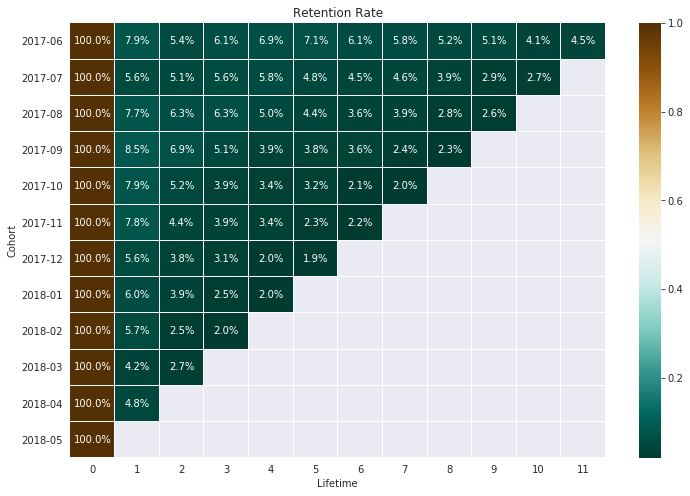

In [53]:
plt.figure(figsize=(12, 8))
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=0.01, linecolor='white', cmap='BrBG_r')
plt.title('Retention Rate')
plt.xlabel('Lifetime')
plt.ylabel('Cohort')
plt.show;

Видим низкие показатели Retention Rate во всех когортах (около 5%). Это, скорее всего, объясняется спецификой сервиса. Судя по всему, пользователи разово посещают Яндекс.Афишу для покупки билетов на какое-то конкретное мероприятие. После этого они, как правило, уже не возвращаются (за исключением людей, постоянно интересующихся культурными событиями: театралов, киноманов и т.д.).

От когорты к когорте Retention Rate отличается не очень сильно: немного выделяются "осенние" когорты (сентябрь-октябрь), где мы видим относительно высокие показатели в первый месяц жизни когорт. В долгосрочной перспективе же чуть лучше выглядит первая когорта (июнь 2017 г.).

Подсчитаем средний Retention Rate на второй месяц "жизни" когорт.

In [54]:
cohorts.loc[cohorts['cohort_lifetime'] == 1]['retention'].mean() * 100

6.516659710392834

Теперь рассмотрим коэффициент оттока - Churn Rate.

In [55]:
cohorts['churn_rate'] = cohorts.groupby('first_visit_month')['uid'].pct_change()

In [56]:
churn_pivot = cohorts.pivot_table(index='first_visit_month', columns='cohort_lifetime', values='churn_rate', aggfunc='sum')
churn_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_visit_month,,,,,,,,,,,,
2017-06,0.0,-0.921336,-0.316395,0.141655,0.116708,0.041804,-0.145723,-0.053152,-0.093995,-0.028818,-0.200297,0.105751
2017-07,0.0,-0.943912,-0.085482,0.094955,0.036585,-0.172549,-0.058452,0.008389,-0.151414,-0.262745,-0.039894,NaN
2017-08,0.0,-0.923092,-0.182631,-0.001563,-0.201878,-0.121569,-0.174107,0.086486,-0.293532,-0.066901,NaN,NaN
2017-09,0.0,-0.914511,-0.190476,-0.267301,-0.223140,-0.039514,-0.052215,-0.325543,-0.056931,NaN,NaN,NaN
2017-10,0.0,-0.921392,-0.335455,-0.254237,-0.120553,-0.059551,-0.336918,-0.046847,NaN,NaN,NaN,NaN
2017-11,0.0,-0.921719,-0.436474,-0.123128,-0.128083,-0.305767,-0.068966,NaN,NaN,NaN,NaN,NaN
2017-12,0.0,-0.944198,-0.319149,-0.181250,-0.348601,-0.060547,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,0.0,-0.940285,-0.341229,-0.365169,-0.189381,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,0.0,-0.942920,-0.554065,-0.210619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


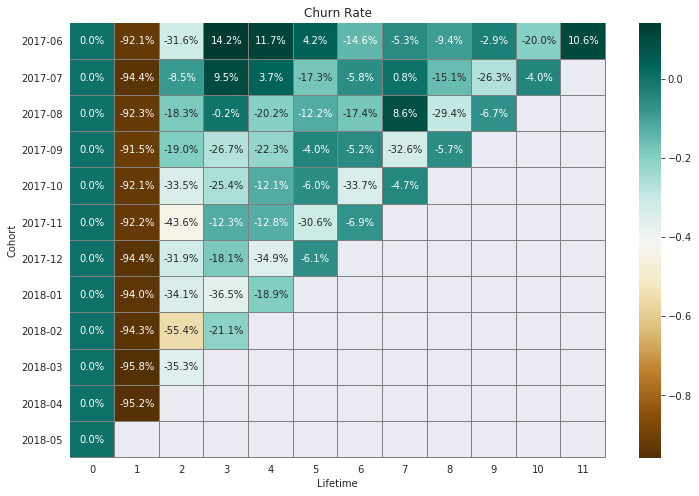

In [57]:
plt.figure(figsize=(12, 8))
sns.heatmap(churn_pivot, annot=True, fmt='.1%', linewidths=0.01, linecolor='gray', cmap='BrBG')
plt.title('Churn Rate')
plt.xlabel('Lifetime')
plt.ylabel('Cohort')
plt.show;

Данные по Churn Rate, в целом, подтверждают наши выводы по таблице Retention Rate. Первый месяц является критичным с точки зрения оттока пользователей (более 90%). Затем темпы оттока замедляются, в некоторых когортах (лето 2017 г.) мы видим даже положительные значения, т.е. люди из этих когорт охотнее возвращаются в Яндекс.Афишу.

### Метрики электронной коммерции

#### Время до совершения покупки

Теперь изучим, сколько времени в среднем проходит с момента первого посещения до совершения покупки.

Добавим в таблицу с заказами дату первого посещения.

In [58]:
orders_visits = orders.join(first_visit_date, on='uid')

In [59]:
orders_visits.head()

,buy_ts,revenue,uid,first_visit_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00


Посчитаем время до совершения покупки в секундах. Для этого из времени заказа вычтем время первого визита.

In [60]:
orders_visits['buy_dur_sec'] = (orders_visits['buy_ts'] - orders_visits['first_visit_date']).dt.seconds

Переведем время в минуты и построим гистограмму.

In [61]:
orders_visits['buy_dur_min'] = orders_visits['buy_dur_sec'] / 60
orders_visits['buy_dur_min'] = orders_visits['buy_dur_min'].astype('int')

In [62]:
orders_visits.head()

,buy_ts,revenue,uid,first_visit_date,buy_dur_sec,buy_dur_min
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,60,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,660,11
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,120,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,900,15
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,1620,27


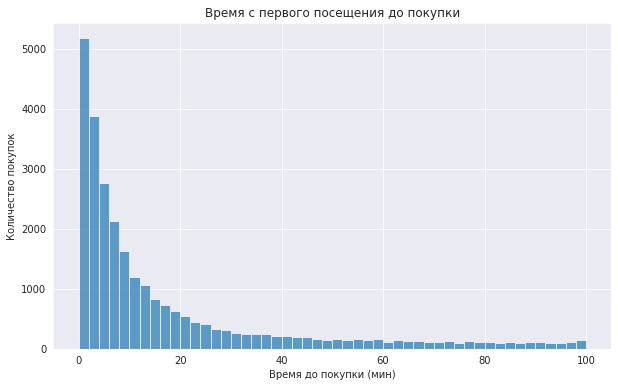

In [63]:
orders_visits['buy_dur_min'].plot.hist(bins=50, range=(0,100), figsize=(10,6), alpha=0.7)
plt.title('Время с первого посещения до покупки')
plt.xlabel('Время до покупки (мин)')
plt.ylabel('Количество покупок')
plt.show;

Т.к. распределение не очень похоже на нормальное, рассчитаем среднее время, используя моду.

In [64]:
orders_visits['buy_dur_min'].mode()

0    1
dtype: int64

Таким образом, типичное время с момента первого посещения до совершения покупки составляет 1 минуту. Т.е. пользователи, судя по всему, уже выбрали нужные им билеты и используют сервис Яндекс.Афиши только для покупки. 

#### Среднее количество покупок

Теперь рассчитаем среднее количество покупок на одного покупателя за месяц.

Выделим столбец с месяцем покупки.

In [65]:
orders['buy_month'] = orders['buy_ts'].astype('datetime64[M]')

In [66]:
orders.head()

,buy_ts,revenue,uid,buy_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01


Посчитаем количество пользователей, количество заказов и сумму заказов для каждого месяца.

In [67]:
buy_per_user = orders.groupby('buy_month').agg({'uid':'nunique', 'revenue':['count','sum']}).reset_index()

In [68]:
buy_per_user.columns = ['buy_month', 'buyers', 'orders', 'revenue_sum']

In [69]:
buy_per_user.head()

,buy_month,buyers,orders,revenue_sum
0,2017-06-01,2023,2354,9557.49
1,2017-07-01,1984,2363,12539.47
2,2017-08-01,1472,1807,8758.78
3,2017-09-01,2750,3387,18345.51
4,2017-10-01,4675,5679,27987.70


Рассчитаем среднее количество покупок и построим график изменения показателя во времени.

In [70]:
buy_per_user['orders_per_user'] = buy_per_user['orders'] / buy_per_user['buyers']

In [71]:
buy_per_user

,buy_month,buyers,orders,revenue_sum,orders_per_user
0,2017-06-01,2023,2354,9557.49,1.163618
1,2017-07-01,1984,2363,12539.47,1.191028
2,2017-08-01,1472,1807,8758.78,1.227582
3,2017-09-01,2750,3387,18345.51,1.231636
4,2017-10-01,4675,5679,27987.70,1.214759
5,2017-11-01,4547,5659,27069.93,1.244557
6,2017-12-01,4942,6218,36388.60,1.258195
7,2018-01-01,3898,4721,19417.13,1.211134
8,2018-02-01,4258,5281,25560.54,1.240254
9,2018-03-01,4181,5326,28834.59,1.273858


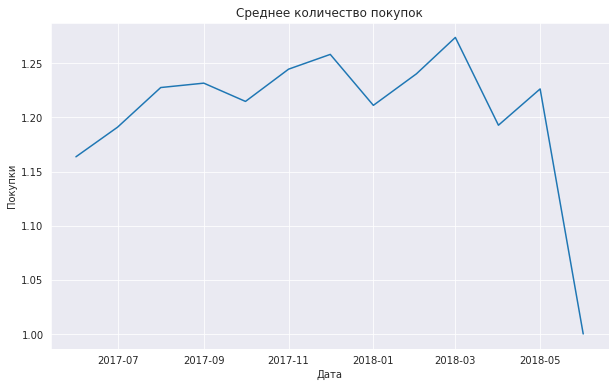

In [72]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='buy_month', y='orders_per_user', data=buy_per_user)
plt.title('Среднее количество покупок')
plt.xlabel('Дата')
plt.ylabel('Покупки')
plt.show;

Среднее количество покупок на покупателя за месяц не очень сильно изменяется в течение рассматриваемого периода. После начального роста (в первые два месяца) мы видим изменения этого показателя как в одну, так и в другую сторону. В июне 2018 г. была совершена 1 покупка, поэтому этот месяц мы можем не учитывать.

#### Средний чек (AOV)

Рассчитаем средний чек (AOV), используя группировку по времени совершения покупки.

In [73]:
buy_per_user['aov'] = buy_per_user['revenue_sum'] / buy_per_user['orders']

In [74]:
buy_per_user.head()

,buy_month,buyers,orders,revenue_sum,orders_per_user,aov
0,2017-06-01,2023,2354,9557.49,1.163618,4.060106
1,2017-07-01,1984,2363,12539.47,1.191028,5.306589
2,2017-08-01,1472,1807,8758.78,1.227582,4.847139
3,2017-09-01,2750,3387,18345.51,1.231636,5.416448
4,2017-10-01,4675,5679,27987.70,1.214759,4.928280


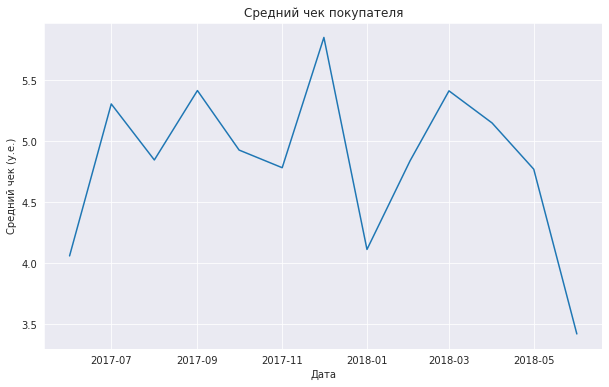

In [75]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='buy_month', y='aov', data=buy_per_user)
plt.title('Средний чек покупателя')
plt.xlabel('Дата')
plt.ylabel('Средний чек (у.е.)')
plt.show;

Средний чек покупателя растет в первый месяц, затем после некоторых колебаний выходит на свой пик к декабрю 2017 г. Это явление, скорее всего, обусловено повышенным спросом на билеты в канун Нового Года и Рождества и высокой стоимостью билетов на новогодние шоу. Затем (в начале 2018 г.) наблюдается спад по среднему чеку, обусловленный "постновогодним синдромом", с дальнейшим ростом показателя и выходом на новый пик в марте. Последний месяц с одной покупкой можно не учитывать.

#### LTV

Теперь рассчитаем средний LTV по когортам за 6 месяцев. Для формирования месячных когорт найдем первый месяц покупки для каждого пользователя.

In [76]:
orders_first_buy = orders.groupby('uid').agg({'buy_month':'min'}).reset_index()

In [77]:
orders_first_buy.columns = ['uid','first_buy_month']

In [78]:
orders_first_buy.head()

,uid,first_buy_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


Посчитаем количество новых покупателей (n_buyers) за каждый месяц.

In [79]:
cohort_sizes = orders_first_buy.groupby('first_buy_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_buy_month','n_buyers']

In [80]:
cohort_sizes

,first_buy_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [81]:
orders_n = orders.merge(orders_first_buy, on='uid')

Сформируем когорты и посчитаем выручку для каждой когорты в каждом месяце.

In [82]:
cohorts = orders_n.groupby(['first_buy_month','buy_month']).agg({'revenue':'sum'}).reset_index()

In [83]:
cohorts.head()

,first_buy_month,buy_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


Добавим столбец с размером когорты.

In [84]:
report = cohort_sizes.merge(cohorts, on='first_buy_month')

In [85]:
report.head()

,first_buy_month,n_buyers,buy_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


Т.к. маржинальность сервиса 100%, то валовая прибыль у нас будет совпадать с выручкой. Добавим столбец с возрастом когорты.

In [86]:
report['age'] = report['buy_month'] - report['first_buy_month']
report['age'] = report['age'] / np.timedelta64(1,'M')
report['age'] = report['age'].round().astype('int')

In [87]:
report.head()

,first_buy_month,n_buyers,buy_month,revenue,age
0,2017-06-01,2023,2017-06-01,9557.49,0
1,2017-06-01,2023,2017-07-01,981.82,1
2,2017-06-01,2023,2017-08-01,885.34,2
3,2017-06-01,2023,2017-09-01,1931.30,3
4,2017-06-01,2023,2017-10-01,2068.58,4


Рассчитаем LTV. Для этого разделим месячную валовую прибыль каждой когорты на количество покупателей.

In [88]:
report['ltv'] = report['revenue'] / report['n_buyers']

In [89]:
output_ltv = report.pivot_table(index='first_buy_month', columns='age', values='ltv', aggfunc='mean')

In [90]:
output_ltv

age,0,1,2,3,4,5,6,7,8,9,10,11
first_buy_month,,,,,,,,,,,,
2017-06-01,4.724414,0.485329,0.437637,0.954671,1.022531,0.735502,0.950440,0.581592,0.553213,0.605788,0.571261,0.256856
2017-07-01,6.010218,0.335211,0.623531,0.358976,0.176791,0.156048,0.120208,0.141820,0.161232,0.147145,0.155673,NaN
2017-08-01,5.276518,0.471993,0.458482,0.391277,0.494051,0.283540,0.210664,0.405007,0.292212,0.187978,NaN,NaN
2017-09-01,5.644529,1.117586,0.520930,3.975792,0.400558,0.647067,0.701608,0.243150,0.184006,NaN,NaN,NaN
2017-10-01,5.003733,0.535763,0.191394,0.157145,0.151560,0.120362,0.084816,0.115470,NaN,NaN,NaN,NaN
2017-11-01,5.154683,0.399233,0.199556,0.324952,0.148013,0.053879,0.114928,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.738191,0.260374,0.925097,1.065275,0.312930,0.338047,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.135636,0.294758,0.304281,0.142778,0.062698,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.156987,0.278274,0.078515,0.074144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


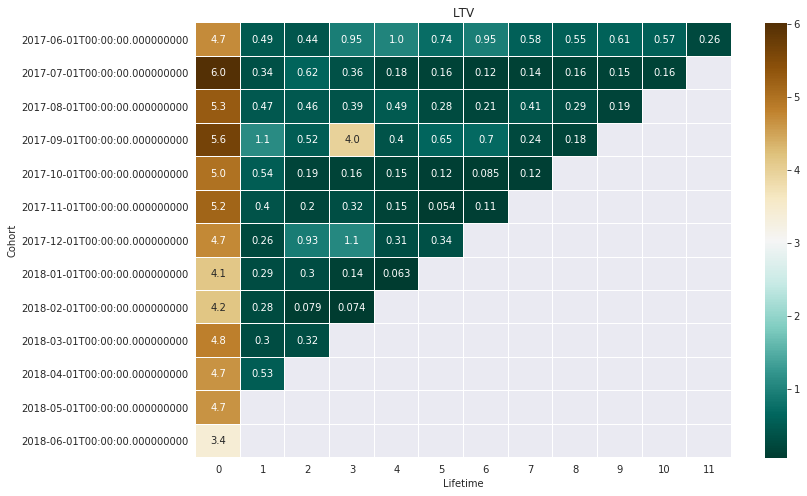

In [91]:
plt.figure(figsize=(12, 8))
sns.heatmap(output_ltv, annot=True, fmt='.2', linewidths=0.01, linecolor='white', cmap='BrBG_r')
plt.title('LTV')
plt.xlabel('Lifetime')
plt.ylabel('Cohort')
plt.show;

Рассчитаем LTV по когортам за 6 месяцев жизни.

In [92]:
mean_ltv = output_ltv.cumsum(axis=1).mean(axis=0).round(2)
mean_ltv

age
0      4.80
1      5.40
2      5.82
3      6.69
4      7.30
5      7.97
6      8.39
7      9.08
8     10.06
9      9.25
10    10.00
11    11.88
dtype: float64

Средний LTV по когортам на 5 месяц жизни (6 месяцев с учетом нулевого) равен 7,97 у.е. Среди когорт, "проживших" не менее 6 месяцев, выделяются первая (июньская) и 4-я (сентябрьская). В них значения LTV превышают среднее. 

### Маркетинговые метрики

Рассчитаем маркетинговые метрики и отобразим на графиках, как они различаются по рекламным источникам.

Сначала определим "главный" источник перехода (source_id) для каждого пользователя. Им будет первый из них (источник первого посещения сервиса).

#### "Главный" источник для каждого пользователя

In [93]:
visits.head()

,device,end_ts,source_id,start_ts,uid,visit_date,visit_month,visit_week,ses_dur_sec,first_visit_date,first_visit_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-01,2017-12-14,1080,2017-12-20 17:20:00,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-01,2018-02-15,1680,2018-02-19 16:53:00,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-07-01,2017-06-29,0,2017-07-01 01:54:00,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-01,2018-05-17,1440,2018-03-09 20:05:00,2018-03-01,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-01,2017-12-21,0,2017-12-27 14:06:00,2017-12-01,0


Для определения главного источника перехода оставим записи только первого посещения.

In [94]:
visits_main_source = visits.query('first_visit_date == start_ts')

In [95]:
visits_main_source['uid'].value_counts()

1981020429381477763     2
15524371937328942332    1
16665837475501700519    1
7994800142069652190     1
3726521408977861965     1
                       ..
5478819024478217093     1
14972238482786245665    1
2969062684770417449     1
7159046031078267112     1
12446258745964853041    1
Name: uid, Length: 228169, dtype: int64

In [96]:
visits_main_source.query('uid == 1981020429381477763')

,device,end_ts,source_id,start_ts,uid,visit_date,visit_month,visit_week,ses_dur_sec,first_visit_date,first_visit_month,cohort_lifetime
44993,touch,2018-03-16 08:57:00,1,2018-03-16 08:55:00,1981020429381477763,2018-03-16,2018-03-01,2018-03-15,120,2018-03-16 08:55:00,2018-03-01,0
47067,touch,2018-03-16 08:55:00,1,2018-03-16 08:55:00,1981020429381477763,2018-03-16,2018-03-01,2018-03-15,0,2018-03-16 08:55:00,2018-03-01,0


Обнаружили повтор по пользователю и времени сессии. Похоже, этот пользователь за одну минуту 2 раза вошел в сервис. Для словаря с главным источником перехода нам не понадобится вторая запись. Удалим ее.

In [97]:
visits_main_source = visits_main_source.drop([47067])

In [98]:
visits_main_source = visits_main_source[['uid','source_id']]
visits_main_source.columns = ['uid','main_source']
visits_main_source.head()

,uid,main_source
0,16879256277535980062,4
1,104060357244891740,2
2,7459035603376831527,5
4,9969694820036681168,3
5,16007536194108375387,5


#### Расходы на маркетинг по источникам

Посчитаем общую сумму затрат на маркетинг. Посмотрим также, как затраты распределяются в зависимости от источника.

In [99]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [100]:
costs['costs'].sum()

329131.62

In [101]:
costs_source = costs.groupby('source_id')['costs'].sum().reset_index()
costs_source

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


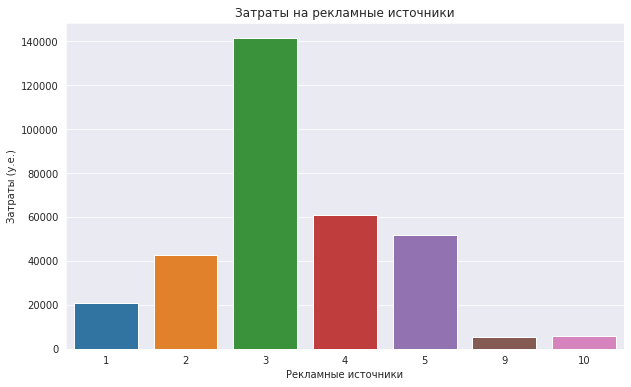

In [102]:
plt.figure(figsize=(10, 6))
sns.barplot(x=costs_source['source_id'], y=costs_source['costs'])
plt.title('Затраты на рекламные источники')
plt.xlabel('Рекламные источники')
plt.ylabel('Затраты (у.е.)')
plt.show;

Видим, что затраты на 3-й источник намного превышают затраты на остальные источники. Показатели по 9-му и 10-му источнику совсем низкие.

In [103]:
costs['month'] = costs['dt'].astype('datetime64[M]')

In [104]:
costs.head()

,source_id,dt,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


Отразим на графике изменения затрат на разные источники во времени.

In [105]:
costs_months = costs.groupby(['source_id','month']).agg({'costs':'sum'}).reset_index()

In [106]:
costs_months.head()

,source_id,month,costs
0,1,2017-06-01,1125.61
1,1,2017-07-01,1072.88
2,1,2017-08-01,951.81
3,1,2017-09-01,1502.01
4,1,2017-10-01,2315.75


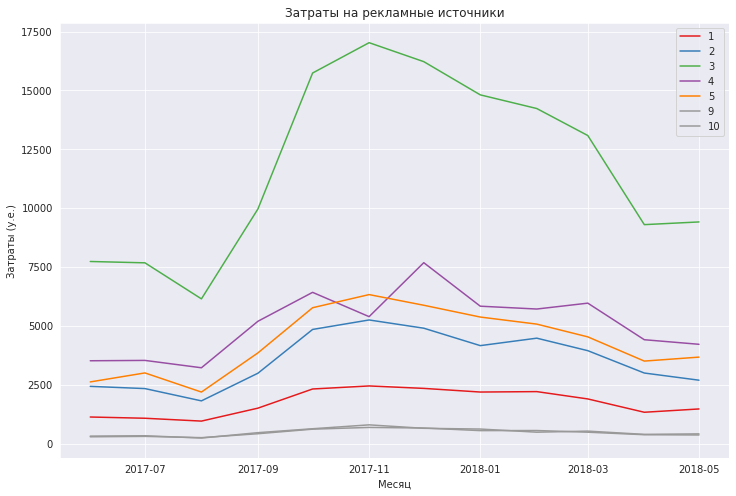

In [107]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='month', y='costs', data=costs_months, hue='source_id', palette='Set1' )
plt.title('Затраты на рекламные источники')
plt.xlabel('Месяц')
plt.ylabel('Затраты (у.е.)')
plt.legend([1,2,3,4,5,9,10])
plt.show;

Видим, что активная рекламная кампания по всем источникам началась в августе 2017 г. (затраты резко начали расти). Эта кампания вышла на пик в ноябре-декабре 2017 г., когда были достигнуты рекордные значения по месячным затратам. После этого (с начала 2018 г.) расходы на проведение рекламных кампаний стали сокращаться вплоть до мая 2018 г.   

#### CAC

Рассчитаем средний САС на одного пользователя для всего проекта и для каждого источника трафика.

Найдем месячные затраты на маркетинг.

In [108]:
monthly_costs = costs.groupby('month')['costs'].sum()
monthly_costs.columns = ['first_buy_month']
monthly_costs.head()

month
2017-06-01    18015.00
2017-07-01    18240.59
2017-08-01    14790.54
2017-09-01    24368.91
2017-10-01    36322.88
Name: costs, dtype: float64

In [109]:
report_new = report.join(monthly_costs, on='first_buy_month' )
report_new

,first_buy_month,n_buyers,buy_month,revenue,age,ltv,costs
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,18015.00
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329,18015.00
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637,18015.00
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671,18015.00
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531,18015.00
...,...,...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87,2,0.315559,30415.27
75,2018-04-01,2276,2018-04-01,10600.69,0,4.657597,22289.38
76,2018-04-01,2276,2018-05-01,1209.92,1,0.531599,22289.38
77,2018-05-01,2988,2018-05-01,13925.76,0,4.660562,22224.27


Вычислим CAC, поделив месячные затраты на количество покупателей в когорте.

In [110]:
report_new['cac'] = report_new['costs'] / report_new['n_buyers']

In [111]:
report_new['cac'].mean().round(2)

9.32

Рассчитали средний CAC на одного покупателя для всего проекта - 9,32 у.е.

Рассчитаем суммарные расходы за каждый месяц по каждому источнику.

In [112]:
sources_costs = costs.groupby(['month','source_id']).agg({'costs':'sum'}).reset_index()
sources_costs.head()

,month,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12


Добавим в таблицу с первым месяцем заказа данные о "главном" источнике перехода для каждого пользователя.

In [113]:
source_orders = orders_first_buy.merge(visits_main_source, on='uid')

In [114]:
source_orders.head()

,uid,first_buy_month,main_source
0,313578113262317,2018-01-01,2
1,1575281904278712,2017-06-01,10
2,2429014661409475,2017-10-01,3
3,2464366381792757,2018-01-01,5
4,2551852515556206,2017-11-01,5


Посчитаем количество новых покупателей (n_buyers) за каждый месяц в зависимости от источника перехода.

In [115]:
source_cohort_sizes = source_orders.groupby(['first_buy_month','main_source']).agg({'uid': 'nunique'}).reset_index()
source_cohort_sizes.columns = ['first_buy_month','source_id','n_source_buyers']

In [116]:
source_cohort_sizes.head()

,first_buy_month,source_id,n_source_buyers
0,2017-06-01,1,190
1,2017-06-01,2,235
2,2017-06-01,3,638
3,2017-06-01,4,413
4,2017-06-01,5,384


In [117]:
sources_costs.columns = ['first_buy_month', 'source_id', 'costs']

Объединим таблицы с данными по месячным расходам и по количеству новых покупателей (для каждого источника).

In [118]:
source_costs_buyers = source_cohort_sizes.merge(sources_costs, on=['first_buy_month','source_id'], how='left')

In [119]:
source_costs_buyers.head()

,first_buy_month,source_id,n_source_buyers,costs
0,2017-06-01,1,190,1125.61
1,2017-06-01,2,235,2427.38
2,2017-06-01,3,638,7731.65
3,2017-06-01,4,413,3514.80
4,2017-06-01,5,384,2616.12


In [120]:
source_costs_buyers.query('costs.isna()')

,first_buy_month,source_id,n_source_buyers,costs
19,2017-08-01,7,1,NaN
85,2018-06-01,4,1,NaN


Видим 2 пропуска в графе расходы: июнь 2018 г. (был всего один покупатель) и август 2017 г. по 7-му источнику перехода (по этому источнику рекламные кампании не проводились).

Рассчитаем CAC для каждого источника трафика.

In [121]:
source_costs_buyers['cac'] = source_costs_buyers['costs'] / source_costs_buyers['n_source_buyers']

In [122]:
source_costs_buyers.head()

,first_buy_month,source_id,n_source_buyers,costs,cac
0,2017-06-01,1,190,1125.61,5.924263
1,2017-06-01,2,235,2427.38,10.329277
2,2017-06-01,3,638,7731.65,12.118574
3,2017-06-01,4,413,3514.80,8.510412
4,2017-06-01,5,384,2616.12,6.812813


Объединим таблицы.

In [123]:
source_orders_new = orders.merge(source_orders, on='uid', how='left')

In [124]:
source_orders_new.head()

,buy_ts,revenue,uid,buy_month,first_buy_month,main_source
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,3


Вычислим сумму выручки для каждого месяца в зависимости от когорты и источника перехода.

In [125]:
report_source = source_orders_new.groupby(['first_buy_month','buy_month','main_source']).agg({'revenue':'sum'}).reset_index()

Добавим в таблицу столбец с возрастом когорты.

In [126]:
report_source['age'] = report_source['buy_month'] - report_source['first_buy_month']
report_source['age'] = report_source['age'] / np.timedelta64(1,'M')
report_source['age'] = report_source['age'].round().astype('int')

In [127]:
report_source = report_source.rename(columns={'main_source':'source_id'})

Объединим таблицы с выручкой и с расходами.

In [128]:
report_source_new = report_source.merge(source_costs_buyers, on=['first_buy_month','source_id'], how='left')

In [129]:
report_source_new.head()

,first_buy_month,buy_month,source_id,revenue,age,n_source_buyers,costs,cac
0,2017-06-01,2017-06-01,1,1378.70,0,190,1125.61,5.924263
1,2017-06-01,2017-06-01,2,1043.68,0,235,2427.38,10.329277
2,2017-06-01,2017-06-01,3,2804.34,0,638,7731.65,12.118574
3,2017-06-01,2017-06-01,4,1959.84,0,413,3514.80,8.510412
4,2017-06-01,2017-06-01,5,1898.89,0,384,2616.12,6.812813


Рассчитаем LTV. Для этого разделим месячную валовую прибыль (совпадает с выручкой) каждой когорты на количество покупателей.

In [130]:
report_source_new['ltv'] = report_source_new['revenue'] / report_source_new['n_source_buyers']

Построим сводную таблицу для подсчета CAC для каждого источника трафика.

In [131]:
output_cac_source = report_source_new.pivot_table(index='first_buy_month', columns='source_id', values='cac', aggfunc='mean')

In [132]:
output_cac_source.round(2)

source_id,1,2,3,4,5,9,10
first_buy_month,,,,,,,
2017-06-01,5.92,10.33,12.12,8.51,6.81,4.19,3.31
2017-07-01,6.71,11.22,14.99,6.83,7.09,5.82,6.47
2017-08-01,8.42,14.72,18.23,9.52,6.07,4.08,6.29
2017-09-01,6.62,13.51,12.76,8.80,6.54,4.78,5.36
2017-10-01,6.81,12.23,13.66,5.48,6.10,4.84,3.00
2017-11-01,7.55,13.19,14.00,4.58,9.13,4.71,6.19
2017-12-01,7.07,12.86,12.32,5.58,7.62,5.44,7.60
2018-01-01,9.19,14.24,14.72,5.65,8.49,6.84,6.68
2018-02-01,8.02,15.27,13.03,5.16,7.48,6.57,3.91


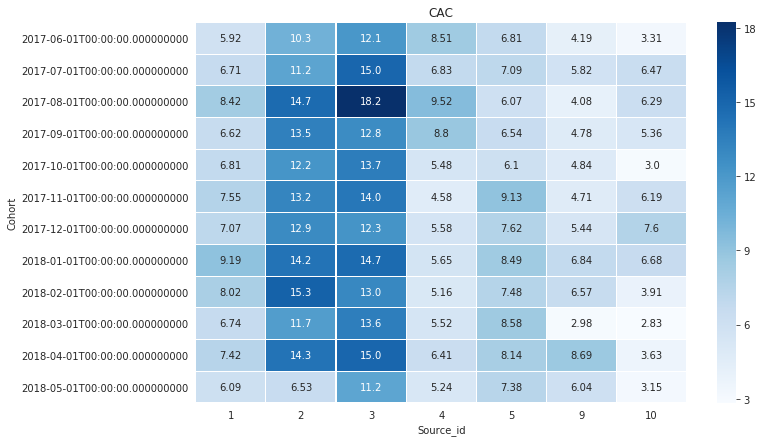

In [133]:
plt.figure(figsize=(11, 7))
sns.heatmap(output_cac_source, annot=True, fmt='.3', linewidths=0.01, linecolor='white', cmap='Blues')
plt.title('CAC')
plt.xlabel('Source_id')
plt.ylabel('Cohort')
plt.show;

In [134]:
output_cac_source.mean(axis=1).round(2)

first_buy_month
2017-06-01    7.31
2017-07-01    8.44
2017-08-01    9.62
2017-09-01    8.34
2017-10-01    7.45
2017-11-01    8.48
2017-12-01    8.35
2018-01-01    9.40
2018-02-01    8.49
2018-03-01    7.43
2018-04-01    9.08
2018-05-01    6.51
dtype: float64

In [135]:
output_cac_source.mean(axis=0).round(2)

source_id
1      7.21
2     12.50
3     13.80
4      6.44
5      7.45
9      5.41
10     4.87
dtype: float64

По когортам наблюдается следующая картина. Максимальных значений CAC достигает в августовской (2017 г.) и январской (2018 г.) когортах. В первом случае это может объясняться серьезными вложениями в рекламные кампании накануне старта театрального сезона (конец лета), во втором - снижением покупательской активности в январе в связи с новогодними каникулами.

По источникам трафика же выделяются 2-й и 3-й. Стоимость привлечения клиента через эти источники достигает 12,5-14 у.е. Оценить эффективность таких серьезных вложений нам поможет показатель ROMI.

#### ROMI

Рассчитаем ROMI по когортам в разрезе источников трафика. Для этого поделим LTV на CAC.

In [136]:
report_source_new.head()

,first_buy_month,buy_month,source_id,revenue,age,n_source_buyers,costs,cac,ltv
0,2017-06-01,2017-06-01,1,1378.70,0,190,1125.61,5.924263,7.256316
1,2017-06-01,2017-06-01,2,1043.68,0,235,2427.38,10.329277,4.441191
2,2017-06-01,2017-06-01,3,2804.34,0,638,7731.65,12.118574,4.395517
3,2017-06-01,2017-06-01,4,1959.84,0,413,3514.80,8.510412,4.745375
4,2017-06-01,2017-06-01,5,1898.89,0,384,2616.12,6.812813,4.945026


In [137]:
report_source_new['romi'] = report_source_new['ltv'] / report_source_new['cac']

Построим сводную таблицу, чтобы посчитать накопительный ROMI (используя метод cumsum()).

In [138]:
output_romi_source = report_source_new.pivot_table(index=['first_buy_month','source_id'], columns='age',
    values='romi', aggfunc='mean')
romi_source = output_romi_source.cumsum(axis=1).round(2)
romi_source.head(10)

age                          0     1     2     3     4     5     6     7   \
first_buy_month source_id                                                   
2017-06-01      1          1.22  1.59  1.97  2.60  3.32  3.67  4.10  4.53   
                2          0.43  0.48  0.50  0.69  0.85  0.94  1.10  1.24   
                3          0.36  0.37  0.39  0.41  0.43  0.44  0.45  0.46   
                4          0.56  0.56  0.58  0.64  0.77  0.95  1.11  1.14   
                5          0.73  0.86  0.92  1.05  1.15  1.19  1.33  1.41   
                9          0.85  0.87  1.01  1.15  1.22  1.32  1.45  1.48   
                10         0.73  0.77   NaN   NaN   NaN   NaN   NaN   NaN   
2017-07-01      1          1.09  1.25  2.05  2.27  2.41  2.54  2.61  2.70   
                2          0.75  0.82  0.83  0.85  0.89  0.91  0.94  0.95   
                3          0.41  0.42  0.43  0.46  0.46  0.47  0.47  0.48   

age                          8     9     10    11  
first_buy_month source_id                          
2017-06-01      1          4.91  5.19  5.40  5.68  
                2          1.37  1.44  1.57  1.61  
                3          0.46  0.47  0.47  0.47  
                4          1.17  1.26  1.41  1.42  
                5          1.49  1.63  1.66  1.67  
                9          1.61  1.64  1.66   NaN  
                10         0.77   NaN   NaN   NaN  
2017-07-01      1          2.83  2.98  3.12   NaN  
                2          0.96  0.98  1.01   NaN  
                3          0.48  0.49  0.49   NaN

Подробнее остановимся на перспективных источниках трафика - 1-м и 9-м.

In [139]:
romi_source_1 = romi_source.query('source_id == 1')

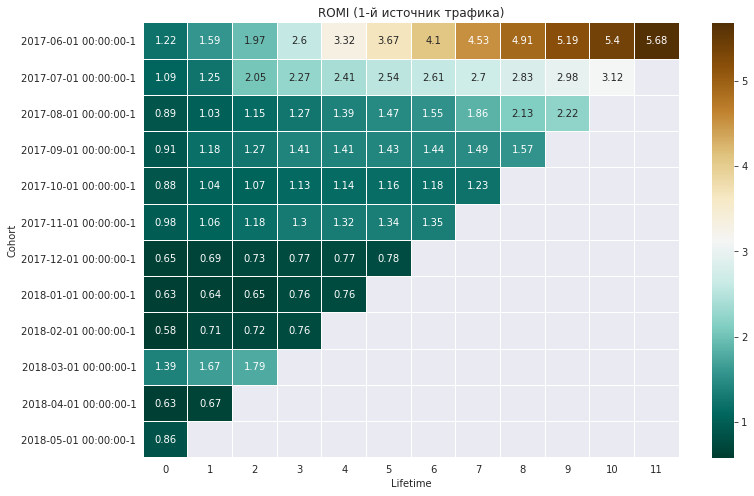

In [140]:
plt.figure(figsize=(12, 8))
sns.heatmap(romi_source_1, annot=True, fmt='.3', linewidths=0.01, linecolor='white', cmap='BrBG_r')
plt.title('ROMI (1-й источник трафика)')
plt.xlabel('Lifetime')
plt.ylabel('Cohort')
plt.show;

In [141]:
romi_source_9 = romi_source.query('source_id == 9')

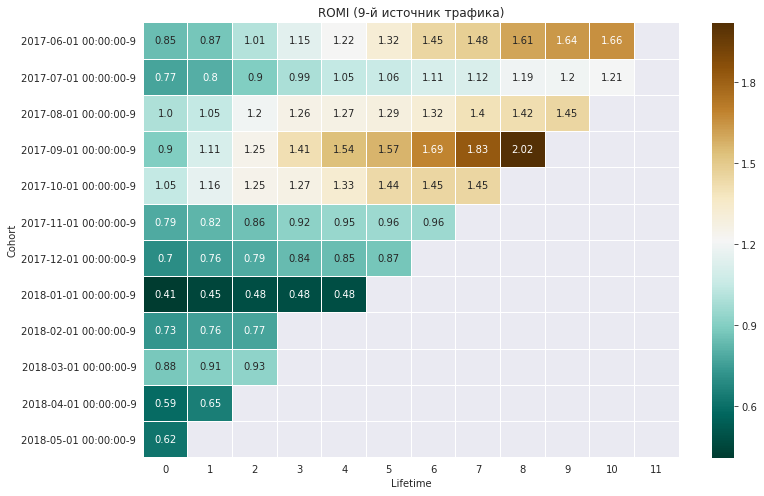

In [142]:
plt.figure(figsize=(12, 8))
sns.heatmap(romi_source_9, annot=True, fmt='.3', linewidths=0.01, linecolor='white', cmap='BrBG_r')
plt.title('ROMI (9-й источник трафика)')
plt.xlabel('Lifetime')
plt.ylabel('Cohort')
plt.show;

В случае с 1-м источником трафика большая часть когорт окупается уже к 3-му месяцу жизни. Для 9-го источника этот показатель чуть хуже - 4 месяц.

Посчитаем среднюю когорту - усредним ROMI всех когорт за каждый месяц их жизни. Вычислим, как быстро в среднем когорты окупаются.

In [143]:
output_romi_source.cumsum(axis=1).mean(axis=0).round(2)

age
0     0.67
1     0.73
2     0.81
3     0.92
4     1.02
5     1.13
6     1.21
7     1.30
8     1.40
9     1.42
10    1.66
11    2.17
dtype: float64

В среднем когорты окупаются на 5-й месяц жизни.

## Общий вывод

Изучив данные Яндекс.Афиши с июня 2017 г. по май 2018 г. (посещения, заказы, рекламные расходы), мы можем сделать следующие выводы:

1. Наиболее перспективными источниками трафика являются 1-й и 9-й (жаль, что нам не дали словаря с расшифровкой источников). Этот факт подтверждается показателями ROMI: большинство когорт по этим источникам окупаются к 3-4 месяцу жизни (при средней окупаемости на 5-й месяц). Примечательно, что таких показателей удалось добиться при небольших затратах на рекламные кампании по этим источникам. Для сравнения, 3-й источник на фоне очень больших вложений демонстрирует неубедительные показатели по окупаемости.


2. Анализ продуктовых метрик и метрик электронной коммерции позволяет выявить следюущие закономерности:
- максимальный приток новых пользователей наблюдался в ноябре-декабре 2017 г.; это связано как с сезонностью сервиса (повыешнный спрос на новогодние мероприятия), так и отдачей от мощной рекламной кампании по всем источникам;
- типичная продолжительность сессии - всего лишь 60 секунд; также это время от первого посещения до совершения покупки, т.е. пользователи не задерживаются на сайте; исправить положение может наполнение сайта Яндекс.Афиши интересной информацией о культурных событиях, спортивных мероприятиях и т.д.;
- низкие показатели Retention Rate по всем когортам, обусловленные спецификой сервиса; для исправления сложившейся ситуации отделу маркетинга можно попробовать "удержать" пользователя в сервисе с помощью накопительных бонусов, скидок и т.д.

3. Самыми перспективными для компании когортами клиентов представляются июньская (2017) и сентябрьская (2017). Такой вывод мы можем сделать на основании высоких показателей LTV и Retention Rate по этим когортам. Особенно заметна разница между этими и другими когортами в долгосрочной перспективе: на 6-м месяце жизни они смотрятся на порядок интереснее всех остальных. 